# Exploratory Data Analysis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Loading the data
df = pd.read_csv('./data/data_wrangling.csv')

In [3]:
# Checking the loaded file
pd.set_option('display.max_columns', len(df.columns))
df.head()

,log_price,price,availability_365,review_scores_cleanliness,bathrooms_text,instant_bookable,maximum_nights,reviews_per_month,host_response_time,latitude,bedrooms,accommodates,availability_30,longitude,availability_60,review_scores_checkin,host_is_superhost,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,has_availability,review_scores_rating,review_scores_value,review_scores_accuracy
0,6.150603,469.0,0,10.0,11,False,730,0.10,1,43.64590,5.0,10,0,-79.42423,0,10.0,False,28,0,71,7.0,0,14,0,True,100.0,10.0,10.0
1,4.543295,94.0,365,10.0,5,True,365,1.19,0,43.64080,1.0,2,30,-79.37673,60,10.0,False,180,90,122,1.0,2,21,0,True,97.0,10.0,10.0
2,4.276666,72.0,365,10.0,4,True,28,1.64,1,43.69805,1.0,3,30,-79.45411,60,10.0,False,28,90,15,1.0,2,36,0,True,95.0,10.0,10.0
3,4.605170,100.0,283,9.0,2,False,365,0.86,4,43.63539,2.0,5,0,-79.44010,0,10.0,False,30,8,109,2.0,0,14,2,True,93.0,9.0,9.0
4,4.532599,93.0,363,10.0,3,False,60,0.60,3,43.74922,2.0,4,28,-79.29188,58,10.0,False,2,88,128,2.0,2,24,1,True,99.0,10.0,10.0


In [4]:
# Checking the information about the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   log_price                  10799 non-null  float64
 1   price                      10799 non-null  float64
 2   availability_365           10799 non-null  int64  
 3   review_scores_cleanliness  10799 non-null  float64
 4   bathrooms_text             10799 non-null  int64  
 5   instant_bookable           10799 non-null  bool   
 6   maximum_nights             10799 non-null  int64  
 7   reviews_per_month          10799 non-null  float64
 8   host_response_time         10799 non-null  int64  
 9   latitude                   10799 non-null  float64
 10  bedrooms                   10799 non-null  float64
 11  accommodates               10799 non-null  int64  
 12  availability_30            10799 non-null  int64  
 13  longitude                  10799 non-null  flo

There are total 28 columns in the dataframe. Out of 28 columns 3 columns are bool type, 12 are float type and 13 are int type.

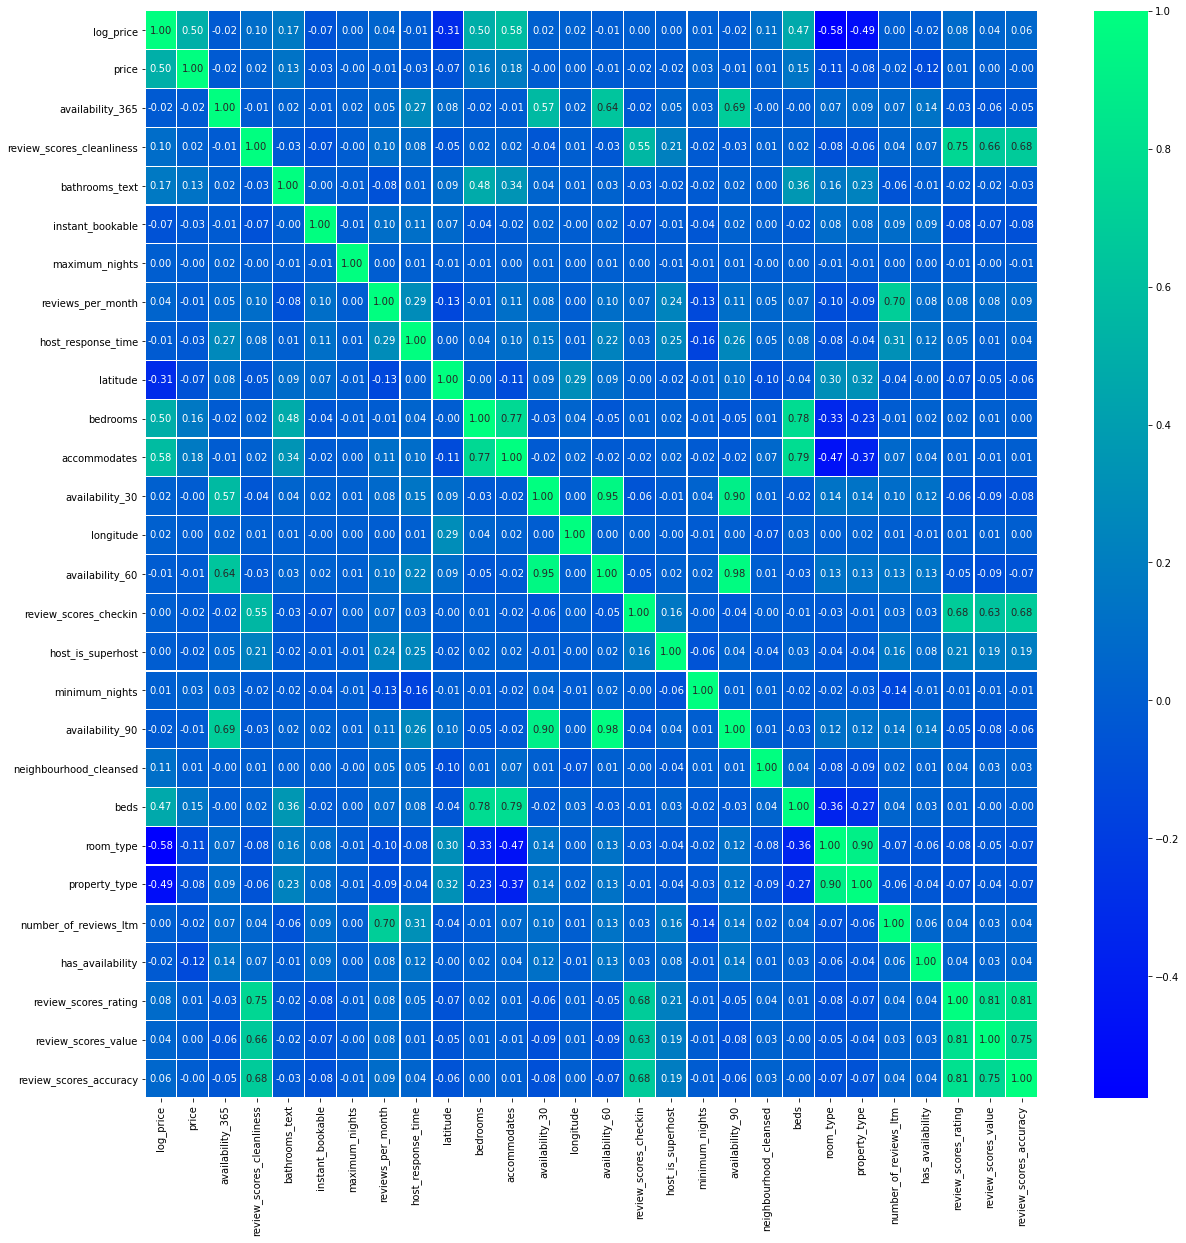

In [5]:
# Plotting the correlation heatmap
dfcorr = df.corr()
fig,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(dfcorr, annot= True,fmt = '.2f', lw = 0.2, cmap = 'winter')

It is evident from the correlation heat map that number of person accomodated in the listing, beds and bedrooms in the listings have significant effect on the price of the listing. Number of batrooms and neighbourhood_cleansed are also contributing to pricing of the listings. 

As, it is clear from the heatmap, some of the columns have zero effect on the price. Such columns can be dropped. 

In [6]:
# Dropping the columns with zero correlation effect
to_drop = ['maximum_nights', 'availability_30', 'longitude', 'review_scores_accuracy', 'review_scores_value'] 
df.drop(to_drop, inplace=True, axis=1)

In [7]:
# Checking the shape of  DataFrame 
df.shape

(10799, 23)

In [8]:
#Getting more details about the data
df.describe()

,log_price,price,availability_365,review_scores_cleanliness,bathrooms_text,reviews_per_month,host_response_time,latitude,bedrooms,accommodates,availability_60,review_scores_checkin,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,review_scores_rating
count,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.00000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000
mean,4.587674,141.944717,132.810723,9.405408,3.817946,1.028144,2.328271,43.681350,1.423373,3.187795,24.509399,9.74118,25.862209,39.674044,79.950273,1.700806,0.707288,17.392444,3.877211,94.338828
std,0.714854,384.407383,137.310723,1.065511,2.655257,1.381917,1.410977,0.048701,0.798935,2.041321,25.644132,0.79015,37.597828,38.524983,42.115366,1.132960,0.970663,13.044437,9.514493,9.313683
min,2.564949,13.000000,0.000000,2.000000,0.000000,0.010000,0.000000,43.586490,1.000000,1.000000,0.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,20.000000
25%,4.094345,60.000000,0.000000,9.000000,2.000000,0.170000,1.000000,43.645135,1.000000,2.000000,0.000000,10.00000,19.000000,0.000000,42.000000,1.000000,0.000000,8.000000,0.000000,93.000000
50%,4.584967,98.000000,89.000000,10.000000,3.000000,0.500000,2.000000,43.662960,1.000000,2.000000,11.000000,10.00000,28.000000,35.000000,87.000000,1.000000,0.000000,14.000000,1.000000,97.000000
75%,5.010635,150.000000,261.000000,10.000000,5.000000,1.290000,4.000000,43.701375,2.000000,4.000000,56.000000,10.00000,28.000000,84.000000,122.000000,2.000000,2.000000,28.000000,4.000000,100.000000
max,9.472705,13000.000000,365.000000,10.000000,26.000000,13.540000,4.000000,43.843760,9.000000,16.000000,60.000000,10.00000,1125.000000,90.000000,139.000000,13.000000,3.000000,64.000000,185.000000,100.000000


Mean price = 141.944717

Median price = 98.000000

Minimum price = 13.000000	

Maximum price = 13000.000000

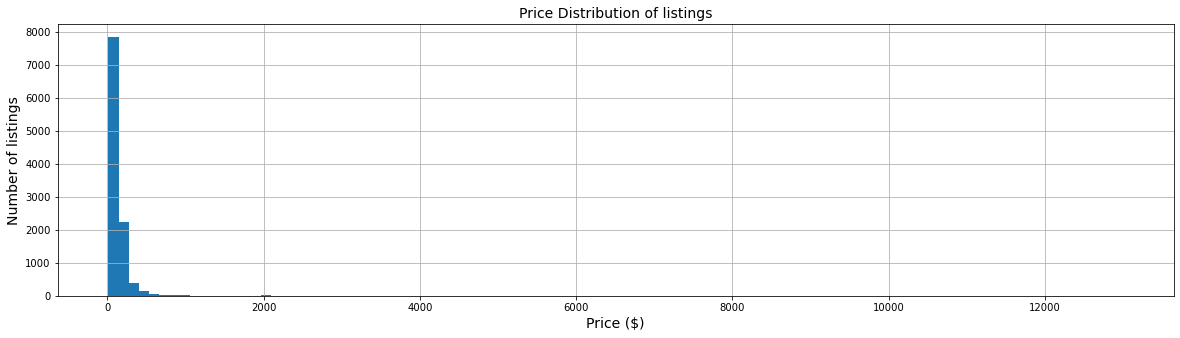

In [9]:
# Distribution of prices 
plt.figure(figsize=(20,5))
df.price.hist(bins=100)
plt.title("Price Distribution of listings", fontsize=14)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Number of listings", fontsize=14)
plt.show()

In [10]:
#Number of listings charging less than $50 
print(f"Number of listings charging less then $50 per night = {sum(df['price']<=50)}")

Number of listings charging less then $50 per night = 1978


In [11]:
#Number of listings charging less than or equal to $100 
print(f"Number of listings charging less then $50 per night = {sum(df['price']<=100)}")

Number of listings charging less then $50 per night = 5946


In [12]:
#Number of listings charging greater than $1000 
print(f"Number of listings charging less then $50 per night = {sum(df['price']>1000)}")

Number of listings charging less then $50 per night = 57


From above, it is clear that about 18% of the listings are priced below or equal to 50 dollars, more than 55% of the listings are priced below 100 dollars and only 57 listings are priced at 1000 dollar or more

As ther is a huge variation in the listing price. I want to check the relation of number of guest accomodating in a listing to price of the listings. 

## Questions to ask

During exploratory data analysis, I would like to get answers for my 3 questions below:
1. Does neighborhood affect listing price?
2. Does property type affect listing price?
3. How price varies with bedrooms, beds, people accommodated and bathrooms?

### Does neighborhood affect listing price?

In [13]:
# Finding the most neighbourhood_cleansed  listings
df['neighbourhood_cleansed'].value_counts().head()

122    1914
87      432
3       336
23      312
119     292
Name: neighbourhood_cleansed, dtype: int64

In [14]:
# Transform neighbourhood_cleansed type encoders into a list
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./LabelEncoder/neighbourhood_cleansed.npy', allow_pickle=True)
neigh = list(le.inverse_transform(range(0,len(df['neighbourhood_cleansed'].value_counts()))))
print(neigh[121])
print(neigh[86])
print(neigh[2])
print(neigh[22])
print(neigh[118])

Victoria Village
Newtonbrook West
Alderwood
Centennial Scarborough
Thorncliffe Park


Victoria Village, Newtonbrook West, Alderwood, Centennial Scarborough, Thorncliffe Park neighborhoods have most listing.

In [15]:
# Transform property type encoders into a list
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./LabelEncoder/property_type.npy', allow_pickle=True)
prop = list(le.inverse_transform(range(0,len(df['property_type'].value_counts()))))

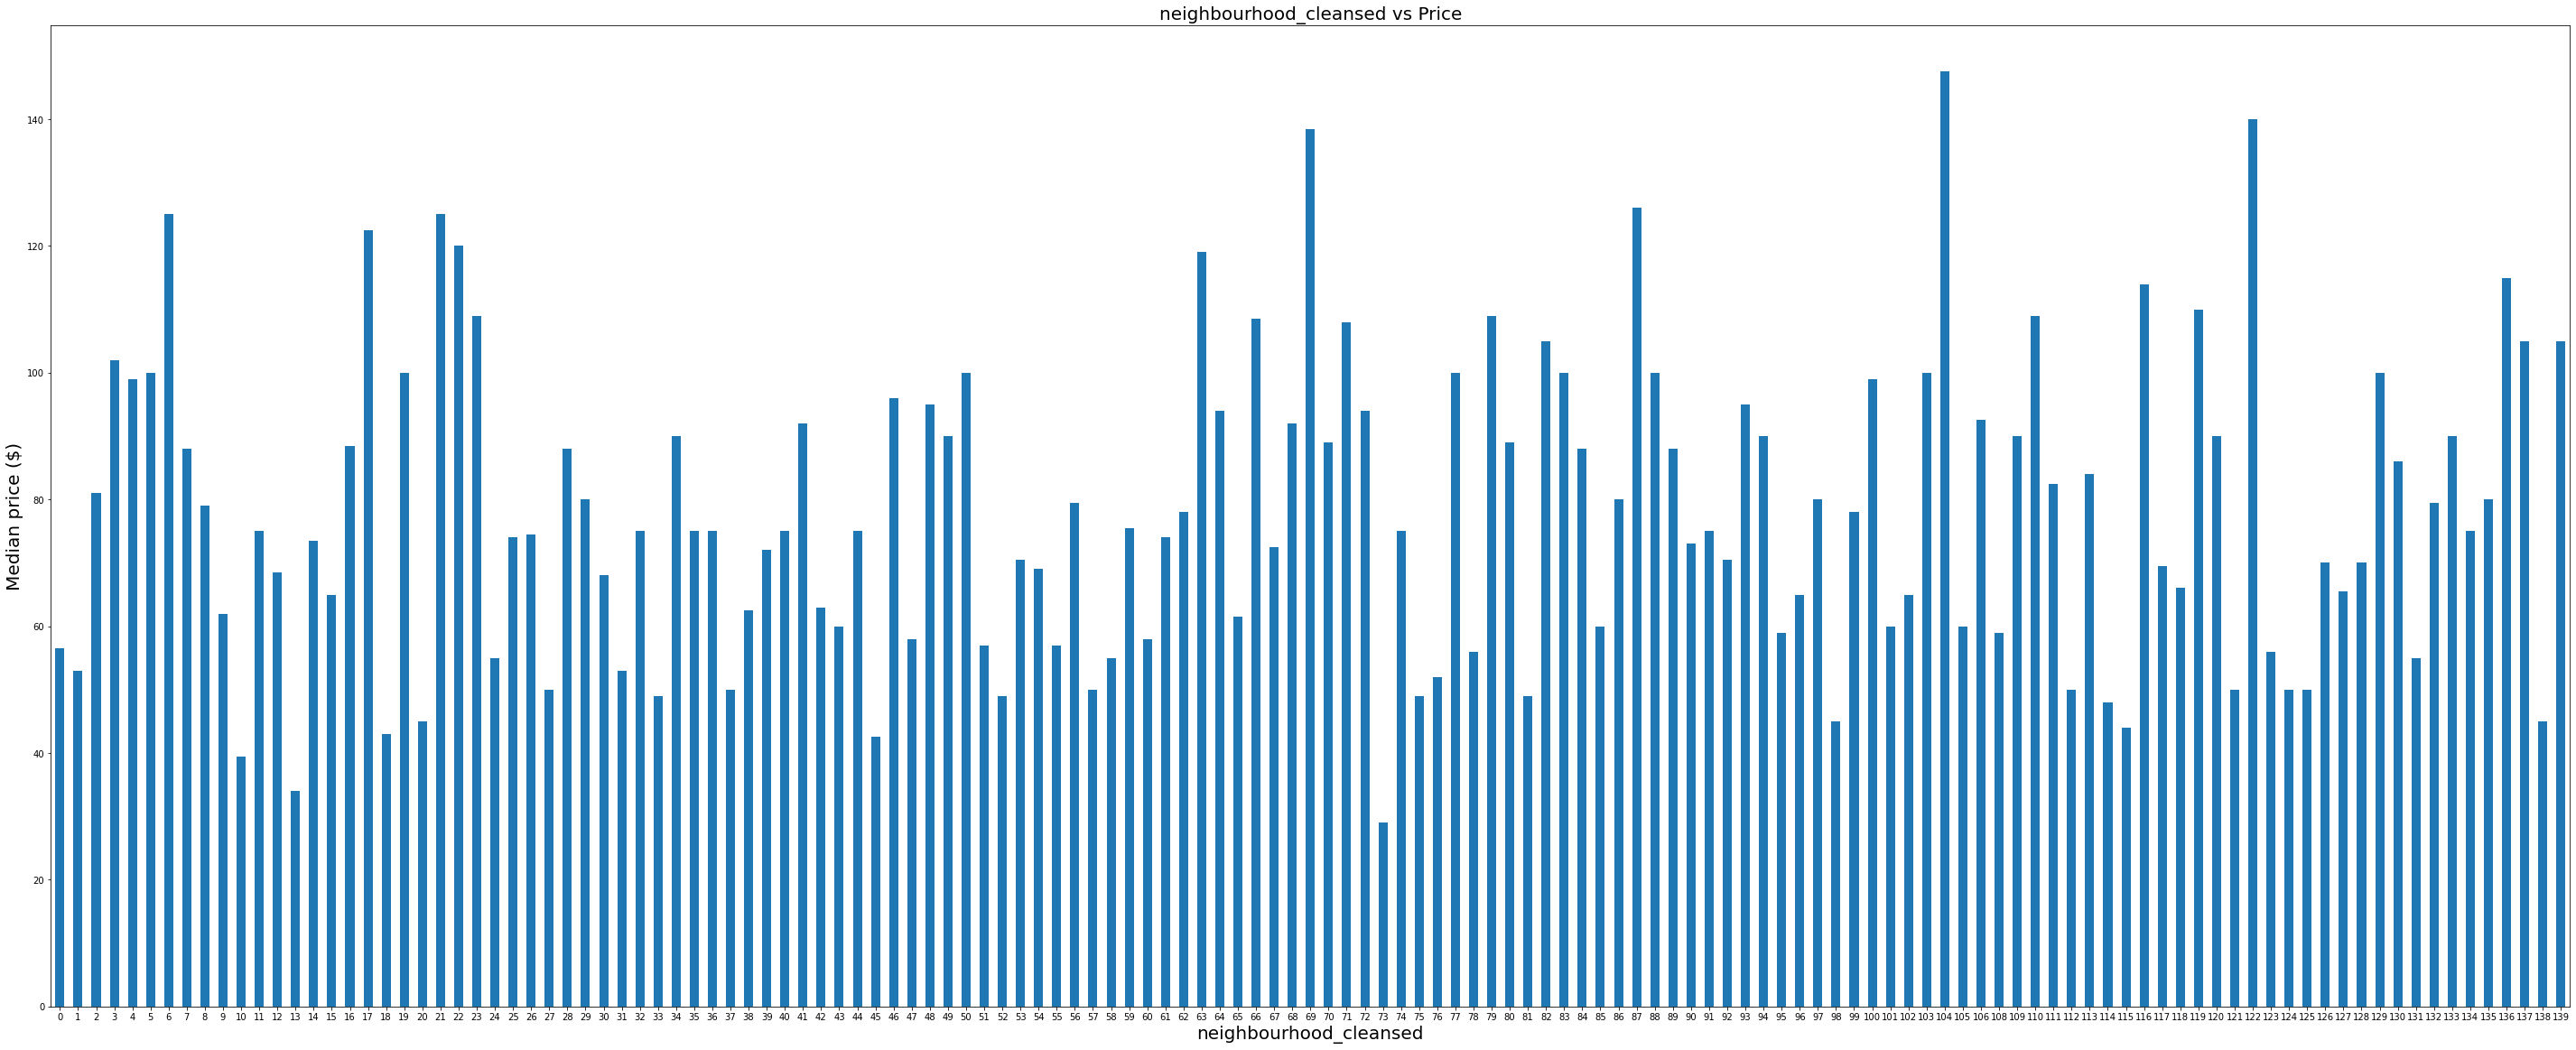

In [16]:
# Median price of Airbnbs as neighbourhood_cleansed
plt.figure(figsize=(50,20))
df.groupby('neighbourhood_cleansed')['price'].median().plot(kind='bar')
plt.title('neighbourhood_cleansed vs Price', fontsize=20)
plt.xlabel('neighbourhood_cleansed', fontsize=20)
plt.ylabel('Median price ($)', fontsize=20)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

Neighborhoods with most listings also have high priced listings.

In [17]:
# Sorting by price in descending order
df.sort_values(by = 'price', ascending = False).head(20)

,log_price,price,availability_365,review_scores_cleanliness,bathrooms_text,instant_bookable,reviews_per_month,host_response_time,latitude,bedrooms,accommodates,availability_60,review_scores_checkin,host_is_superhost,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,has_availability,review_scores_rating
5807,9.472705,13000.0,0,7.0,2,False,0.10,1,43.78592,2.0,4,0,7.0,False,365,0,86,3.0,0,6,0,True,60.0
3828,9.472705,13000.0,0,10.0,2,False,0.09,1,43.64903,1.0,2,0,10.0,False,28,0,122,1.0,0,8,0,True,100.0
7314,9.425452,12400.0,38,10.0,2,False,0.61,1,43.65797,1.0,2,9,10.0,True,30,38,94,2.0,0,5,0,True,97.0
1529,9.375855,11800.0,0,10.0,6,False,0.54,1,43.67794,1.0,2,0,9.0,False,28,0,3,0.0,2,36,0,False,92.0
5324,9.350102,11500.0,180,10.0,2,False,0.63,1,43.63562,3.0,4,60,10.0,False,28,90,87,3.0,0,8,0,True,99.0
7178,9.210340,10000.0,0,9.0,12,False,0.42,1,43.67121,1.0,1,0,10.0,False,28,0,3,1.0,2,36,0,False,94.0
6663,9.210340,10000.0,31,10.0,7,False,4.24,2,43.64535,3.0,8,1,9.0,False,29,31,122,4.0,0,8,0,True,96.0
5776,9.061492,8617.0,0,9.0,6,False,0.29,1,43.67806,1.0,2,0,9.0,False,28,0,3,1.0,2,36,0,False,96.0
6646,9.061144,8614.0,0,8.0,11,False,0.21,1,43.67333,1.0,1,0,8.0,False,28,0,3,1.0,2,44,0,False,76.0
6651,8.922658,7500.0,0,10.0,16,False,0.43,1,43.66930,1.0,2,0,9.0,False,28,0,3,1.0,2,36,0,False,95.0


In [18]:
# Finding most expensive neighbourhood
print(neigh[85])
print(neigh[121])
print(neigh[93])
print(neigh[2])
print(neigh[86])

Newtonbrook East
Victoria Village
Old East York
Alderwood
Newtonbrook West


Newtonbrook East, Victoria Village, Old East York, Alderwood and Newtonbrook West are most expensive neighborhood

In [19]:
#Checking the propery types of the most expensive neighborhood
print(prop[5])
print(prop[7])
print(prop[4])
print(prop[35])

Entire apartment
Entire cabin
Earth house
Private room in hostel


These listings are in elite neighborhoods and most of these listings are entire apartment, entire cabin, Earth house.

### Does property type affect listing price?

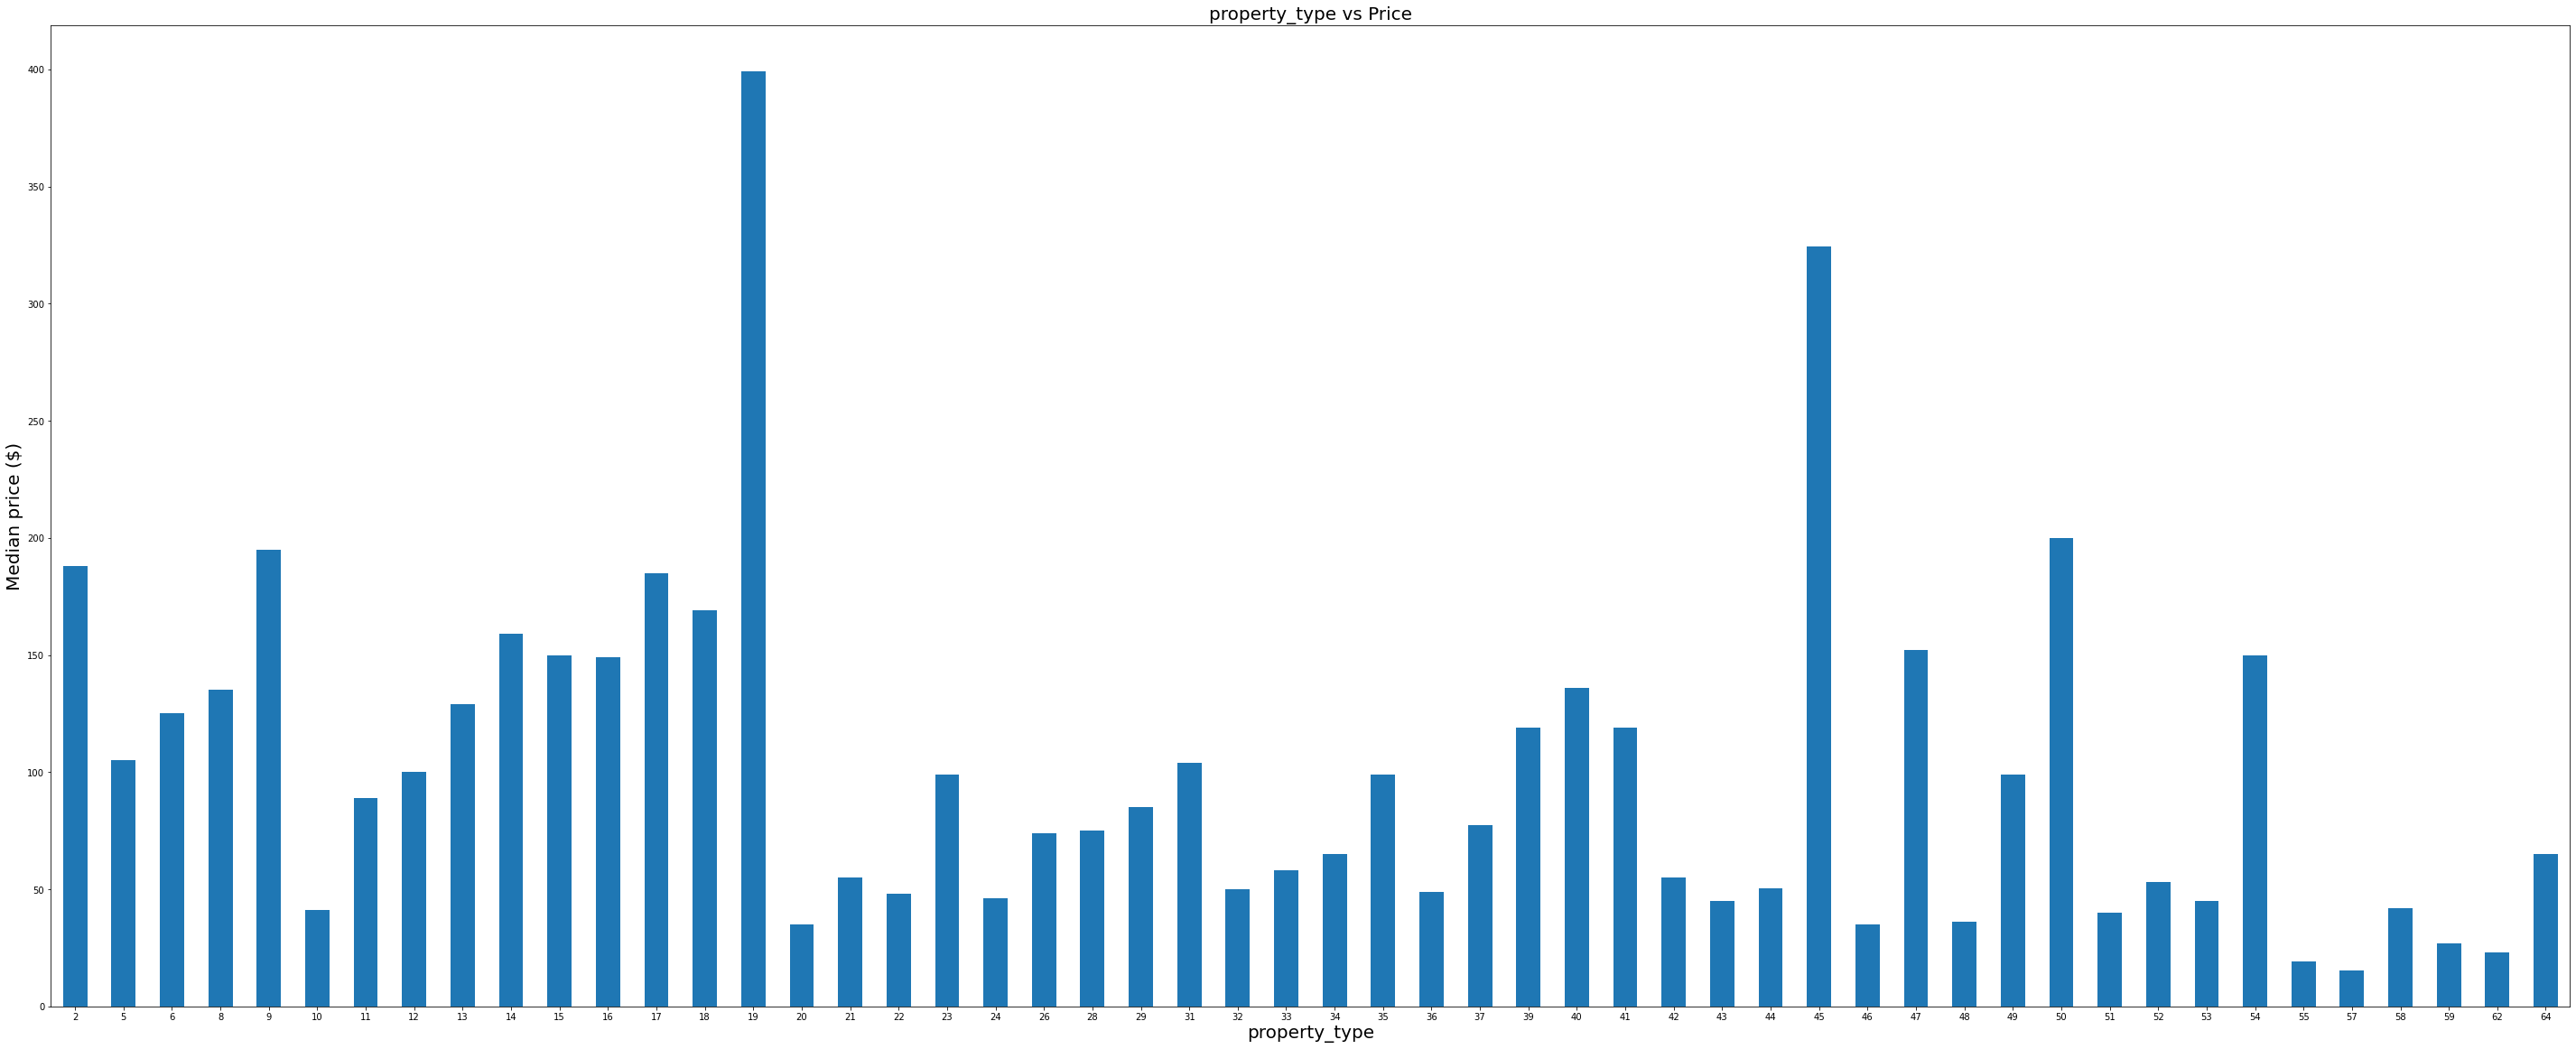

In [20]:
# Median price of Airbnbs as neighbourhood_cleansed
plt.figure(figsize=(50,20))
df.groupby('property_type')['price'].median().plot(kind='bar')
plt.title('property_type vs Price', fontsize=20)
plt.xlabel('property_type', fontsize=20)
plt.ylabel('Median price ($)', fontsize=20)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

In [21]:
# Finding the major property_type of listings 
df['property_type'].value_counts().head()

8     2495
5     2204
36    1760
14    1214
21     644
Name: property_type, dtype: int64

In [22]:
print(prop[7])
print(prop[4])
print(prop[35])
print(prop[13])
print(prop[20])

Entire cabin
Earth house
Private room in hostel
Entire home/apt
Private room


The most common listings are entire cabin, earth house, private room in hostel, entire home/apt or private room type.

From the above plot it is clear that property type number 19 and 45 are very highly priced.I will check the kind of property.

In [23]:
# Finding the property kind
print(prop[18])
print(prop[44])

Entire townhouse
Private room in villa


It is now strongly confirmed that entire townhouse or private room in villa are highly priced.

### How price varies with bedrooms, beds, people accommodated and bathrooms?

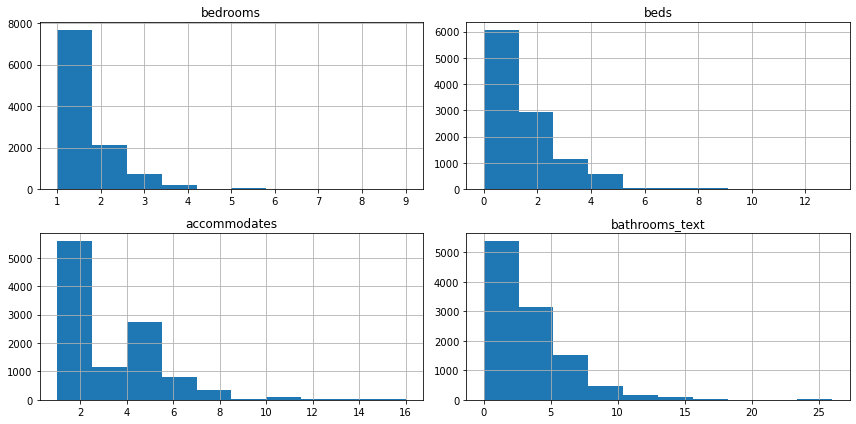

In [24]:
# Frequency distribution of bedrooms, beds, number of persons accomodated and bathrooms
df[['bedrooms','beds','accommodates', 'bathrooms_text']].hist(figsize=(12,6));
plt.tight_layout()

* About 70% of the listings have single bedrooms and 53% of the listings have single bed only.
* About 52% of the listings can accommodates 2 or less persons.
* About 50% of the listings have 2 bathroom availability

In [25]:
# Getting information about room type
df['room_type'].value_counts()

0    7017
2    3630
3     113
1      39
Name: room_type, dtype: int64

In [26]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./LabelEncoder/room_type.npy', allow_pickle=True)
print(le.inverse_transform(range(0,len(df['room_type'].value_counts()))))

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


From above, we can conclude that Entire home/apt are highest on the listings followed by private rooms. Hotel rooms as expected are least listings on Airbnb.

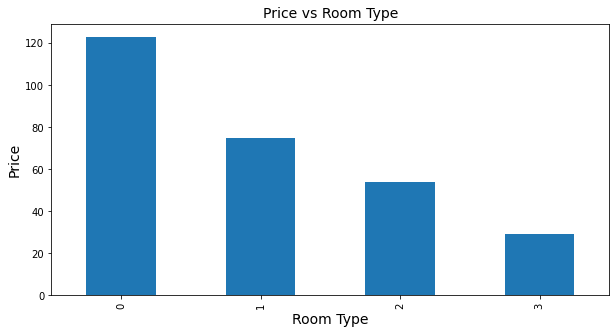

In [27]:
# Effect of room type on price
plt.figure(figsize=(10,5))
df.groupby('room_type')['price'].median().plot(kind='bar')
plt.title('Price vs Room Type', fontsize=14)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

The above plot shows that price are highest for listings with Entire home/apartment followed by Hotel room prices. As expected shared rooms have least prices.

### How price varies with  bedrooms,  beds, people accommodated  and bathrooms 

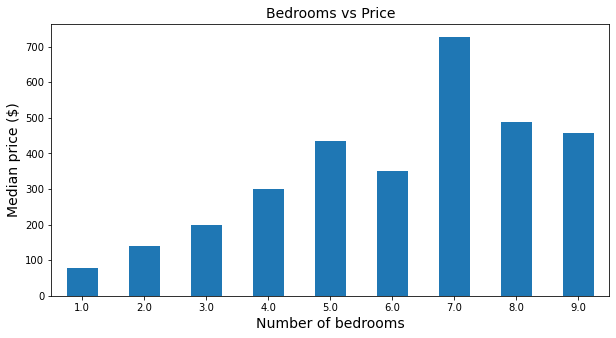

In [28]:
# Median price of Airbnbs as per number of bedrooms 
plt.figure(figsize=(10,5))
df.groupby('bedrooms')['price'].median().plot(kind='bar')
plt.title('Bedrooms vs Price', fontsize=14)
plt.xlabel('Number of bedrooms', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

Price of the listings increases with availability of number of bedrooms. Listings with 7 bedrooms are priced really high, I want to check the propety_type of these listings.

In [29]:
# Checking the property_type of listings with 7 bedrooms
df[df['bedrooms']==7]

,log_price,price,availability_365,review_scores_cleanliness,bathrooms_text,instant_bookable,reviews_per_month,host_response_time,latitude,bedrooms,accommodates,availability_60,review_scores_checkin,host_is_superhost,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,has_availability,review_scores_rating
7372,6.588926,727.0,361,10.0,13,True,0.76,4,43.65759,7.0,16,60,10.0,False,2,90,100,12.0,0,14,3,True,98.0
7626,6.588926,727.0,361,10.0,13,True,0.13,4,43.65572,7.0,16,60,10.0,False,2,90,79,9.0,0,14,0,True,100.0
7956,5.703782,300.0,0,8.0,12,False,1.26,1,43.79210,7.0,15,0,10.0,False,1,0,65,7.0,2,36,22,True,93.0
8117,6.588926,727.0,361,10.0,13,True,0.32,4,43.65534,7.0,16,60,10.0,False,2,90,79,9.0,0,14,1,True,100.0
8118,6.484635,655.0,0,10.0,13,True,0.13,4,43.65740,7.0,16,0,9.0,True,1,0,100,9.0,0,14,0,True,100.0


The listings with 7 bedrooms have property_type of 14 and 36. 

In [30]:
# Finding the property
print(prop[13])
print(prop[35])

Entire home/apt
Private room in hostel


It is clear that these listings are of Entire home/apt and Private room in hostel, that is the reason for high price of these listings.

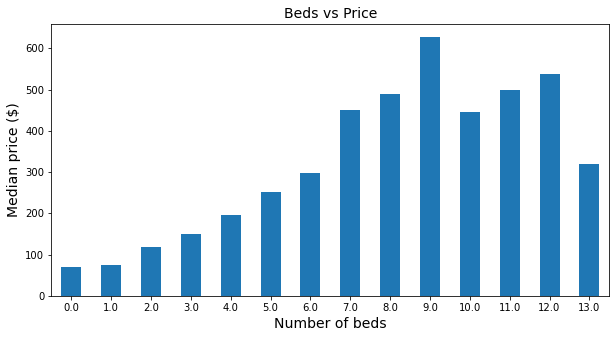

In [31]:
# Median price of Airbnbs as per number of beds in the listing
plt.figure(figsize=(10,5))
df.groupby('beds')['price'].median().plot(kind='bar')
plt.title('Beds vs Price', fontsize=14)
plt.xlabel('Number of beds', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

Price of the listings increases with availability of number of beds

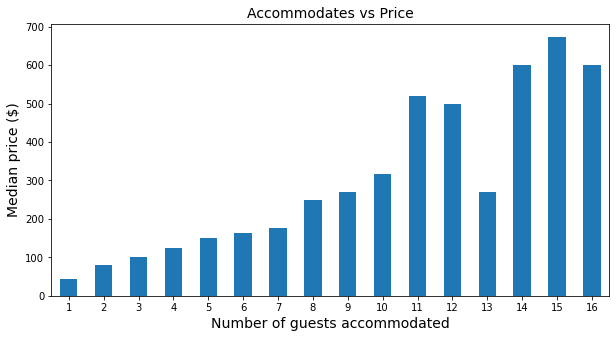

In [32]:
# Median price of Airbnbs accommodating different number of guests
plt.figure(figsize=(10,5))
df.groupby('accommodates')['price'].median().plot(kind='bar')
plt.title('Accommodates vs Price', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

It is understandable from the plot that price of the listings is strongly proportinal to the number of guests accomodated in the listing. It can be easily observed that the median price of listings drop drastically when number of guests accomodated are 13.

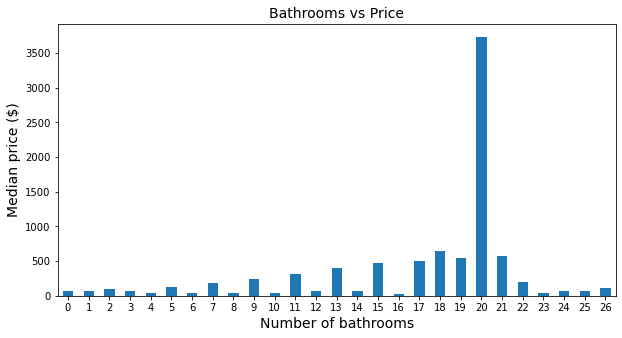

In [33]:
# Median price of Airbnbs as per number of bathrooms in the listing
plt.figure(figsize=(10,5))
df.groupby('bathrooms_text')['price'].median().plot(kind='bar')
plt.title('Bathrooms vs Price', fontsize=14)
plt.xlabel('Number of bathrooms', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

It is clear that number of bathrooms does not impact the price of the listings. It can be seen that more number of bathrooms does not mean that listing will be priced higher. 

### Bedrooms vs beds


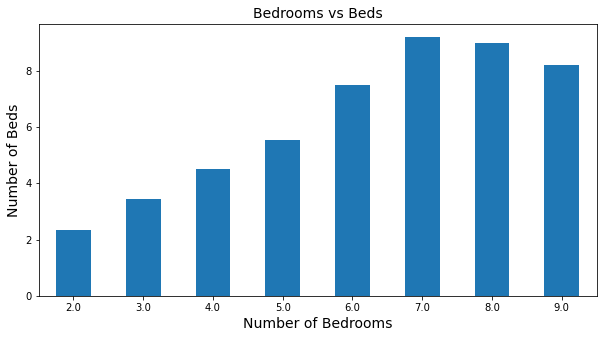

In [34]:
# Bedrooms vs Beds
plt.figure(figsize=(10,5))
df.groupby('bedrooms')['beds'].mean().plot(kind='bar')
plt.title('Bedrooms vs Beds', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Number of Beds', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

It is clear that with increase in bedrooms in the listings, the number of beds also increases.

### Bedrooms vs Bathrooms

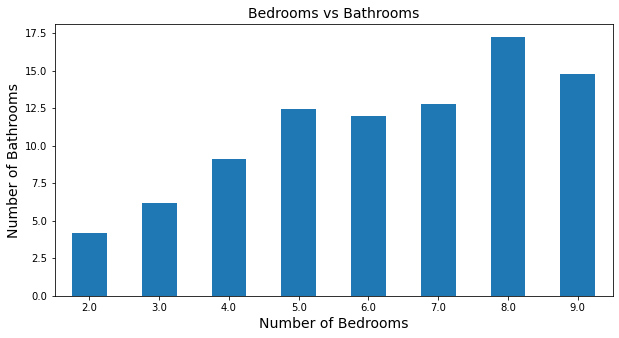

In [35]:
# Bedrooms vs Bathrooms
plt.figure(figsize=(10,5))
df.groupby('bedrooms')['bathrooms_text'].mean().plot(kind='bar')
plt.title('Bedrooms vs Bathrooms', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Number of Bathrooms', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

It is clear that with increase in bedrooms in the listings, the number of bathrooms also increases.

### Bedrooms vs Accommodates

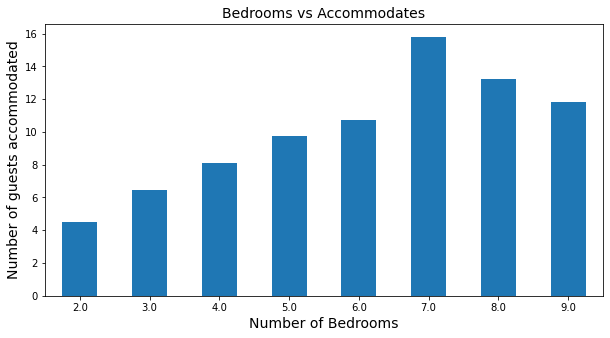

In [36]:
# Bedrooms vs Accommodates
plt.figure(figsize=(10,5))
df.groupby('bedrooms')['accommodates'].mean().plot(kind='bar')
plt.title('Bedrooms vs Accommodates', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Number of guests accommodated', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Number of guests accomodated increses with increase in the number of bedrooms.

## Beds vs Accommodates¶

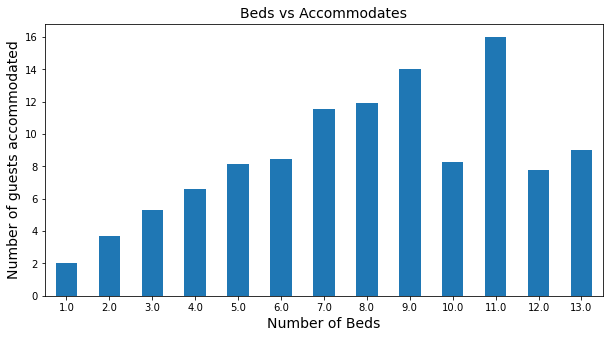

In [37]:
# Beds vs Accommodates
plt.figure(figsize=(10,5))
df.groupby('beds')['accommodates'].mean().plot(kind='bar')
plt.title('Beds vs Accommodates', fontsize=14)
plt.xlabel('Number of Beds', fontsize=14)
plt.ylabel('Number of guests accommodated', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Number of guests accomodated increses with increase in number of beds

In [38]:
bed_proptype = list(df[df['beds']>=10]['property_type'])
set(bed_proptype)

{6, 14, 18, 19}

In [39]:
print(prop[5])
print(prop[13])
print(prop[17])
print(prop[18])

Entire apartment
Entire home/apt
Entire serviced apartment
Entire townhouse


There is not enough data to clearly explain why a listing with 10 or more beds can accomodate only 8 guests.

In [40]:
# Checking most common listings in Toronto
df['property_type'].value_counts().head(5)

8     2495
5     2204
36    1760
14    1214
21     644
Name: property_type, dtype: int64

In [41]:
print(prop[7])
print(prop[4])
print(prop[35])
print(prop[13])

Entire cabin
Earth house
Private room in hostel
Entire home/apt


Most listings are Entire cabin, Earth house, Private room in hostel, Entire home/apt.

In [42]:
# Saving the dataframe
df.to_csv('./data/data_eda.csv', index = False)

# Conclusion

* About 70% of the listings have single bedrooms and about 53% of the listings have single bed only.

* About 52% of the listings can accommodates 2 or less persons.

* About 50% of the listings have 2 bathroom availability

* About 18% of the listings are priced below or equal to 50 dollars, more than 55% of the listings are priced below 
  100 dollars and only 57 listings are priced at 1000 dollar or more.
  
* Neighborhoods with most listings also have high priced listings.

* Most of the listings Entire home/apt are highest on the listings followed by private rooms. Hotel rooms as expected 
  are least listings on Airbnb.

* Listing prices are affected by type of listings.
     * Prices are highest for Entire home/apt followed by hotel rooms price and private rooms. As expected, shared
       room are least priced.

* Listing prices are affected by number of person accomodated in the listing, bedrooms, beds and bathrooms    
  availability.
  
 